# KHAI BÁO THƯ VIỆN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from datetime import datetime


# LOAD DATA

In [30]:
data = pd.read_csv('Gold_2003_2024.csv')
data.head()

,Date,Price,Open,High,Low,Vol,Change%
0,"May 01, 2024","2,332.90","2,319.90","2,360.70","2,314.00",17.04K,+0.35%
1,"Apr 30, 2024","2,324.70","2,368.90","2,368.90","2,318.00",13.50K,-2.32%
2,"Apr 29, 2024","2,379.80","2,369.70","2,380.70","2,353.50",9.15K,+0.44%
3,"Apr 26, 2024","2,369.30","2,368.40","2,385.90","2,360.70",8.13K,+0.20%
4,"Apr 25, 2024","2,364.50","2,352.10","2,379.30","2,338.80",10.21K,+0.18%


In [31]:
data.describe()

,Date,Price,Open,High,Low,Vol,Change%
count,5416,5416,5416,5416,5416,5415,5416
unique,5416,4357,4332,4331,4358,4689,627
top,"May 01, 2024","1,294.80","1,223.00","1,301.30","1,194.60",6.09K,+0.05%
freq,1,6,6,6,5,5,38


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     5416 non-null   object
 1   Price    5416 non-null   object
 2   Open     5416 non-null   object
 3   High     5416 non-null   object
 4   Low      5416 non-null   object
 5   Vol      5415 non-null   object
 6   Change%  5416 non-null   object
dtypes: object(7)
memory usage: 296.3+ KB


# TIỀN XỬ LÝ DỮ LIỆU

### CHUYỂN ĐỔI CỘT DATE VỀ DẠNG SỐ 

In [33]:
# Hàm chuyển đổi định dạng ngày tháng
def convert_date_format(date_str):
    return datetime.strptime(date_str, '%b %d, %Y').strftime('%m/%d/%Y')

# Áp dụng hàm để chuyển đổi định dạng cột Date
data['Date'] = data['Date'].apply(convert_date_format)

data


,Date,Price,Open,High,Low,Vol,Change%
0,05/01/2024,"2,332.90","2,319.90","2,360.70","2,314.00",17.04K,+0.35%
1,04/30/2024,"2,324.70","2,368.90","2,368.90","2,318.00",13.50K,-2.32%
2,04/29/2024,"2,379.80","2,369.70","2,380.70","2,353.50",9.15K,+0.44%
3,04/26/2024,"2,369.30","2,368.40","2,385.90","2,360.70",8.13K,+0.20%
4,04/25/2024,"2,364.50","2,352.10","2,379.30","2,338.80",10.21K,+0.18%
...,...,...,...,...,...,...,...
5411,01/08/2003,354.30,347.30,356.00,345.20,43.30K,+1.90%
5412,01/07/2003,347.70,351.90,352.00,345.00,52.45K,-1.25%
5413,01/06/2003,352.10,351.60,357.00,350.50,39.84K,+0.14%
5414,01/03/2003,351.60,346.00,353.50,343.60,37.93K,+1.47%


### SẮP XẾP CỘT DATE THEO THỨ TỰ TĂNG DẦN THEO NĂM

In [34]:
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by='Date', ascending=True, inplace=True)
data.reset_index(drop=True, inplace=True)
data

,Date,Price,Open,High,Low,Vol,Change%
0,2003-01-02,346.50,347.60,348.20,342.80,39.51K,-0.49%
1,2003-01-03,351.60,346.00,353.50,343.60,37.93K,+1.47%
2,2003-01-06,352.10,351.60,357.00,350.50,39.84K,+0.14%
3,2003-01-07,347.70,351.90,352.00,345.00,52.45K,-1.25%
4,2003-01-08,354.30,347.30,356.00,345.20,43.30K,+1.90%
...,...,...,...,...,...,...,...
5411,2024-04-25,"2,364.50","2,352.10","2,379.30","2,338.80",10.21K,+0.18%
5412,2024-04-26,"2,369.30","2,368.40","2,385.90","2,360.70",8.13K,+0.20%
5413,2024-04-29,"2,379.80","2,369.70","2,380.70","2,353.50",9.15K,+0.44%
5414,2024-04-30,"2,324.70","2,368.90","2,368.90","2,318.00",13.50K,-2.32%


### Loại bỏ dấu thừa và chuẩn hóa đơn vị tính trong bộ dữ liệu

In [35]:
columns = ['Price', 'Open', 'High', 'Low', 'Vol', 'Change%']
for col in columns:
    data[col] = data[col].str.replace(',', '').str.replace('+', '').str.replace('%', '').str.replace('K', '')

data[columns] = data[columns].apply(pd.to_numeric)
data['Vol'] = data['Vol'] * 1000

data

C:\Users\DELL\AppData\Local\Temp\ipykernel_13480\393007436.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[col] = data[col].str.replace(',', '').str.replace('+', '').str.replace('%', '').str.replace('K', '')


,Date,Price,Open,High,Low,Vol,Change%
0,2003-01-02,346.5,347.6,348.2,342.8,39510.0,-0.49
1,2003-01-03,351.6,346.0,353.5,343.6,37930.0,1.47
2,2003-01-06,352.1,351.6,357.0,350.5,39840.0,0.14
3,2003-01-07,347.7,351.9,352.0,345.0,52450.0,-1.25
4,2003-01-08,354.3,347.3,356.0,345.2,43300.0,1.90
...,...,...,...,...,...,...,...
5411,2024-04-25,2364.5,2352.1,2379.3,2338.8,10210.0,0.18
5412,2024-04-26,2369.3,2368.4,2385.9,2360.7,8130.0,0.20
5413,2024-04-29,2379.8,2369.7,2380.7,2353.5,9150.0,0.44
5414,2024-04-30,2324.7,2368.9,2368.9,2318.0,13500.0,-2.32


### KIỂM TRA DỮ LIỆU RỖNG Ở CÁC CỘT

In [36]:
data.isnull().sum()

Date       0
Price      0
Open       0
High       0
Low        0
Vol        1
Change%    0
dtype: int64

In [37]:
data['Vol'].fillna((data['Vol'].mean()), inplace=True)
data.isnull().sum()

Date       0
Price      0
Open       0
High       0
Low        0
Vol        0
Change%    0
dtype: int64

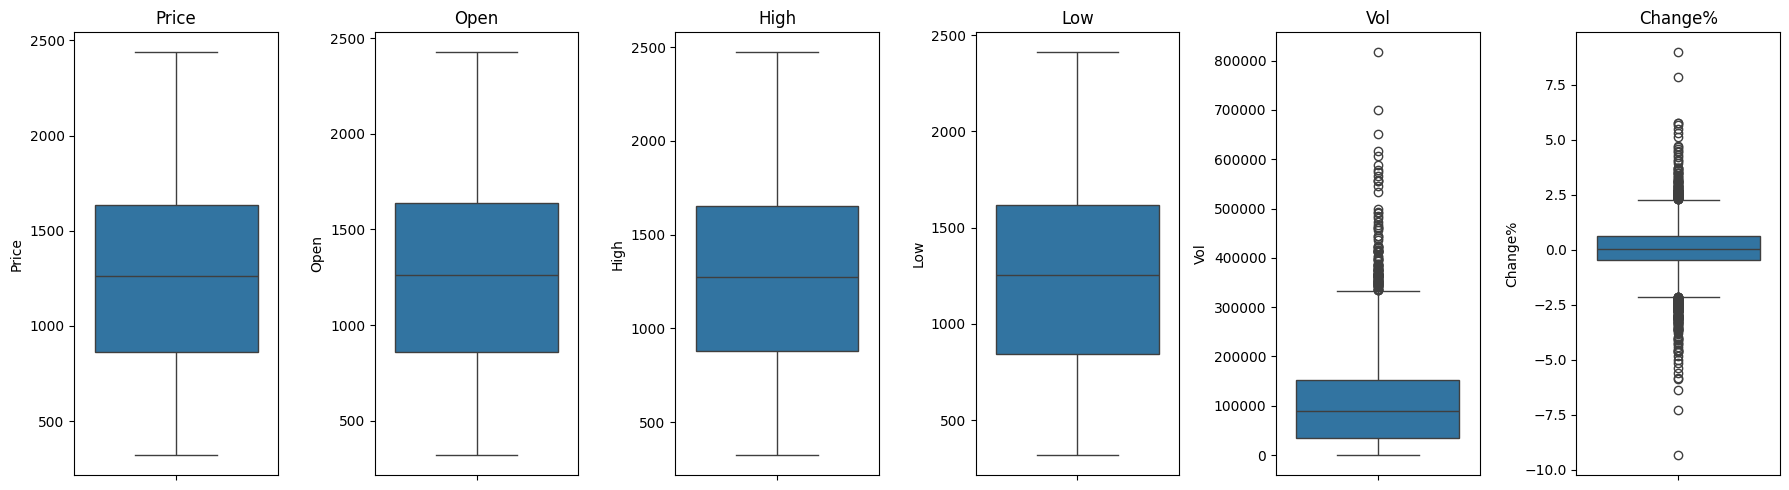

In [38]:
# Chọn các cột cần vẽ biểu đồ boxplot
df = data[['Price', 'Open', 'High', 'Low', 'Vol', 'Change%']]

# Thiết lập cỡ của biểu đồ
plt.figure(figsize=(18, 5))

# Vẽ biểu đồ boxplot cho từng cột
for i, column in enumerate(df.columns, 1):  
    plt.subplot(1, 6, i)
    sns.boxplot(y=df[column])
    plt.title(column)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

In [39]:
# Hàm để xử lý ngoại lệ dựa trên IQR cho một cột cụ thể
def handle_outliers_iqr(df, column):
    IQR = df[column].quantile(0.75) - df[column].quantile(0.25)
    lower_limit = df[column].quantile(0.25) - (IQR * 1.5)
    upper_limit = df[column].quantile(0.75) + (IQR * 1.5)

    print(f"Lower limit for {column}: {lower_limit}")
    print(f"Upper limit for {column}: {upper_limit}")

    # Xử lý các giá trị ngoại lệ
    df[column] = np.where(df[column] > upper_limit, upper_limit,
                          np.where(df[column] < lower_limit, lower_limit, df[column]))

# Xử lý ngoại lệ cho cột 'Vol'
handle_outliers_iqr(data, 'Vol')

# Xử lý ngoại lệ cho cột 'Change%'
handle_outliers_iqr(data, 'Change%')

# Hiển thị dữ liệu sau khi xử lý ngoại lệ
print(data.describe())

Lower limit for Vol: -145970.0
Upper limit for Vol: 332610.0
Lower limit for Change%: -2.1449999999999996
Upper limit for Change%: 2.295
             Price         Open         High          Low            Vol  \
count  5416.000000  5416.000000  5416.000000  5416.000000    5416.000000   
mean   1221.233143  1221.280373  1230.502585  1211.581850  101252.946246   
std     494.701155   494.862067   497.988881   491.442253   81621.140131   
min     322.200000   320.800000   324.000000   319.800000       0.000000   
25%     864.775000   861.300000   876.525000   846.050000   33497.500000   
50%    1262.250000  1261.700000  1271.650000  1255.200000   89175.000000   
75%    1635.575000  1636.425000  1649.925000  1618.275000  153142.500000   
max    2436.100000  2425.400000  2471.300000  2409.400000  332610.000000   

           Change%  
count  5416.000000  
mean      0.051641  
std       0.964136  
min      -2.145000  
25%      -0.480000  
50%       0.050000  
75%       0.630000  
max       

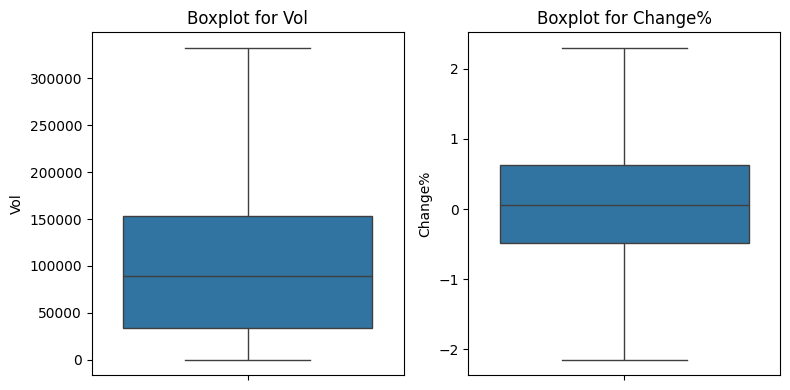

In [40]:
# Vẽ lại boxplot cho hai cột 'Vol' và 'Change%' sau khi xử lý ngoại lệ
plt.figure(figsize=(8, 4))

# Biểu đồ boxplot cho cột 'Vol'
plt.subplot(1, 2, 1)
sns.boxplot(y=data['Vol'])
plt.title('Boxplot for Vol')

# Biểu đồ boxplot cho cột 'Change%'
plt.subplot(1, 2, 2)
sns.boxplot(y=data['Change%'])
plt.title('Boxplot for Change%')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

### SAU KHI XỬ LÝ DỮ LIỆU OUTLIERS THÌ DỮ LIỆU KHÔNG BỊ MẤT MÁT

In [41]:
vol_count = data['Vol'].count()
change_count = data['Change%'].count()
print(vol_count)
print(change_count)

5416
5416


In [42]:
# Lưu dữ liệu đã được tiền xử lý vào file csv mới
data.to_csv('Gold_2003_2024_AfterPreprocessing.csv', index=False)

### CHUẨN HÓA DỮ LIỆU

In [43]:
# Áp dụng MinMaxScaler cho tất cả các cột trong bộ dữ liệu
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Hiển thị dữ liệu đã được chuẩn hóa
scaled_data.head()

,Price,Open,High,Low,Vol,Change%
0,0.011495,0.012734,0.011270,0.011007,0.048388,0.483342
1,0.013908,0.011974,0.013738,0.011390,0.046453,0.590388
2,0.014144,0.014635,0.015368,0.014692,0.048792,0.517750
3,0.012063,0.014777,0.013040,0.012060,0.064235,0.441835
4,0.015185,0.012591,0.014902,0.012155,0.053029,0.613872


In [44]:
# Thêm cột Date vào lại bộ dữ liệu đã chuẩn hóa
scaled_data['Date'] = data['Date']
scaled_data

# Lưu ra file csv mới
scaled_data.to_csv('Gold_2003_2024_Standardization.csv', index=False)

### TRỰC QUAN HÓA DỮ LIỆU

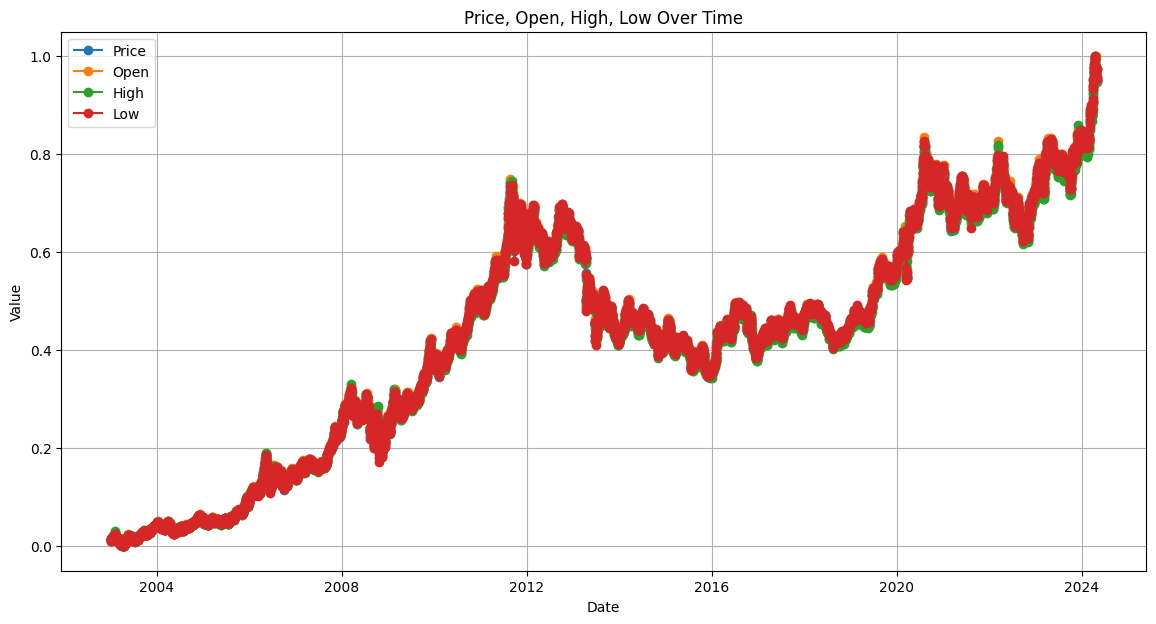

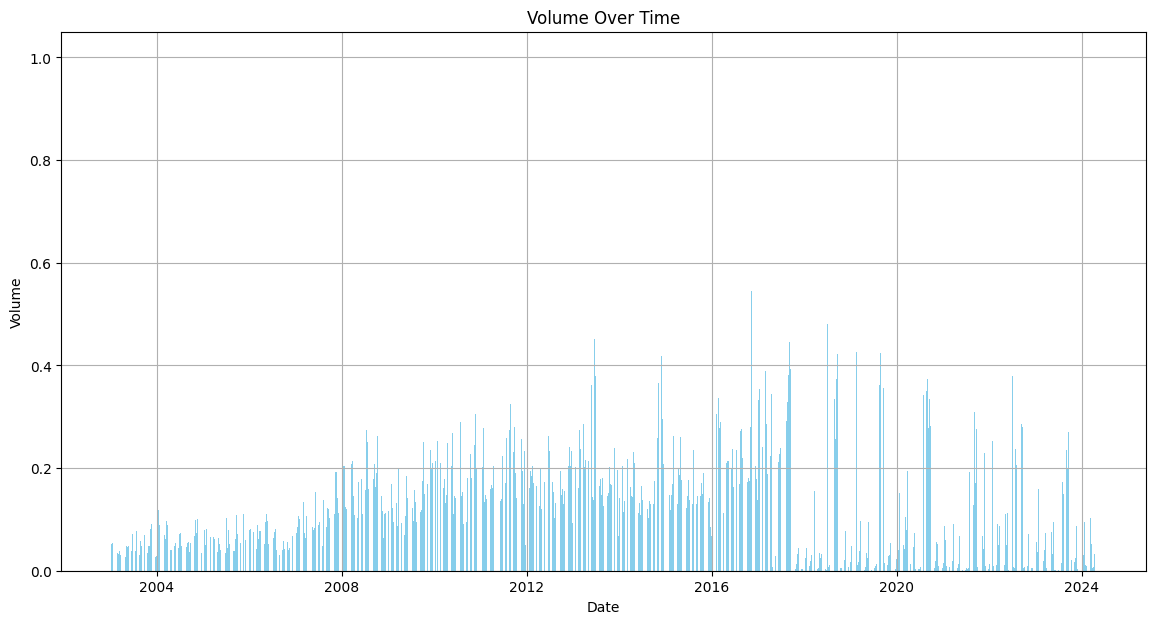

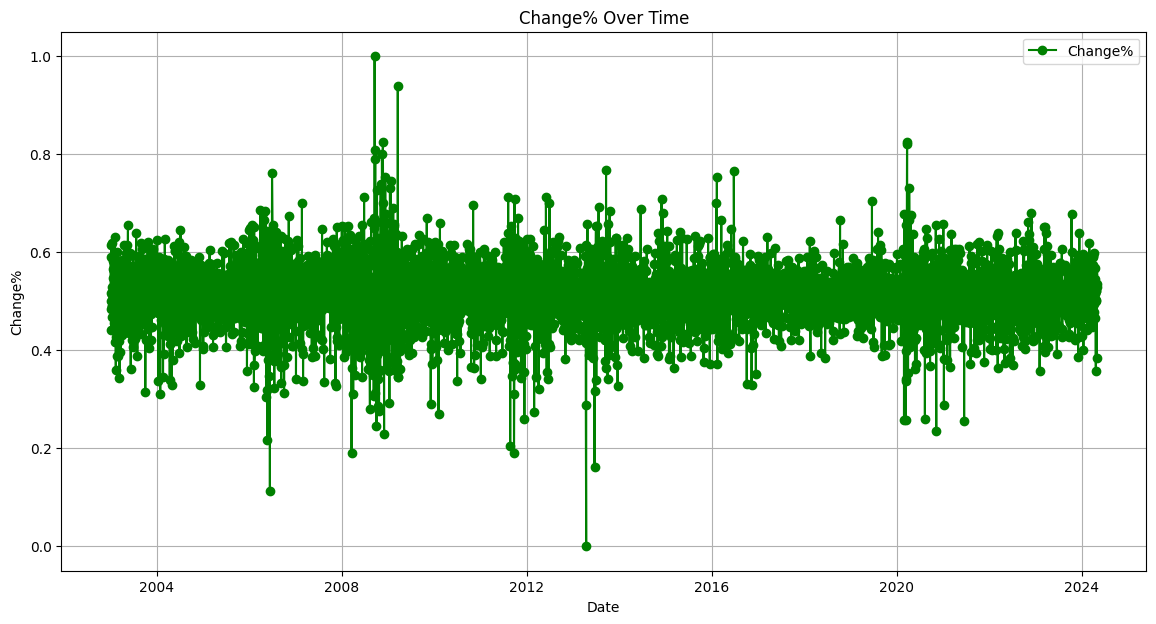

In [45]:

# Chuyển đổi cột 'Date' thành định dạng datetime
scaled_data['Date'] = pd.to_datetime(scaled_data['Date'])

# Thiết lập cột 'Date' làm chỉ số
scaled_data.set_index('Date', inplace=True)

# Biểu đồ đường cho các cột giá
plt.figure(figsize=(14, 7))
plt.plot(scaled_data.index, scaled_data['Price'], label='Price', marker='o')
plt.plot(scaled_data.index, scaled_data['Open'], label='Open', marker='o')
plt.plot(scaled_data.index, scaled_data['High'], label='High', marker='o')
plt.plot(scaled_data.index, scaled_data['Low'], label='Low', marker='o')
plt.title('Price, Open, High, Low Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Biểu đồ thanh cho khối lượng (Vol)
plt.figure(figsize=(14, 7))
plt.bar(scaled_data.index, scaled_data['Vol'], color='skyblue')
plt.title('Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

# Biểu đồ đường cho phần trăm thay đổi (Change%)
plt.figure(figsize=(14, 7))
plt.plot(scaled_data.index, scaled_data['Change%'], label='Change%', color='green', marker='o')
plt.title('Change% Over Time')
plt.xlabel('Date')
plt.ylabel('Change%')
plt.legend()
plt.grid(True)
plt.show()

### BIỂU ĐỒ HEATMAP

C:\Users\DELL\AppData\Local\Temp\ipykernel_13480\2122920192.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


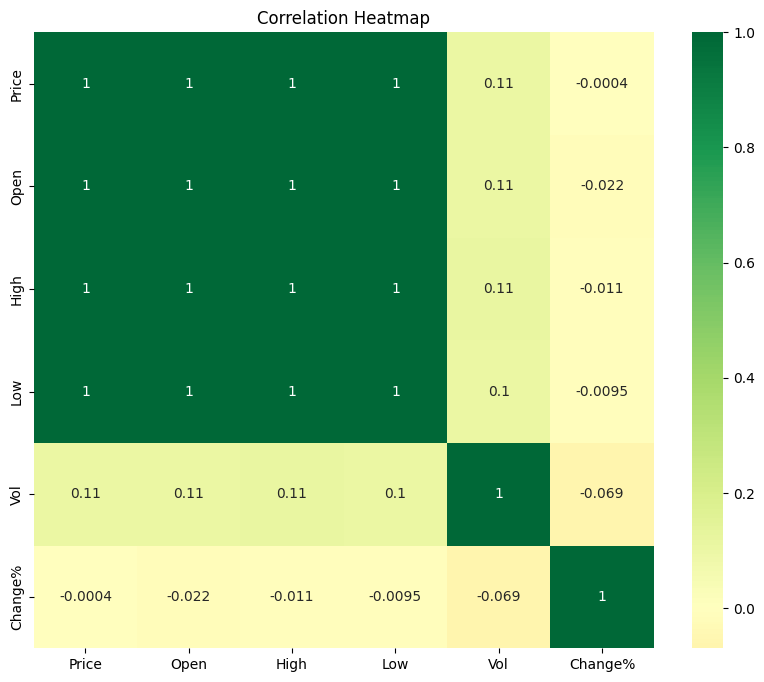

In [46]:
# Tính toán ma trận tương quan
corr_matrix = data.corr()

# Tạo heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', center=0)

# Thiết lập tiêu đề
plt.title('Correlation Heatmap')

# Hiển thị biểu đồ
plt.show()

Price, Open, High, và Low đều có tương quan hoàn hảo với nhau (hệ số tương quan là 1).
Vol và Change% có tương quan thấp hoặc không đáng kể với Price, Open, High, và Low.

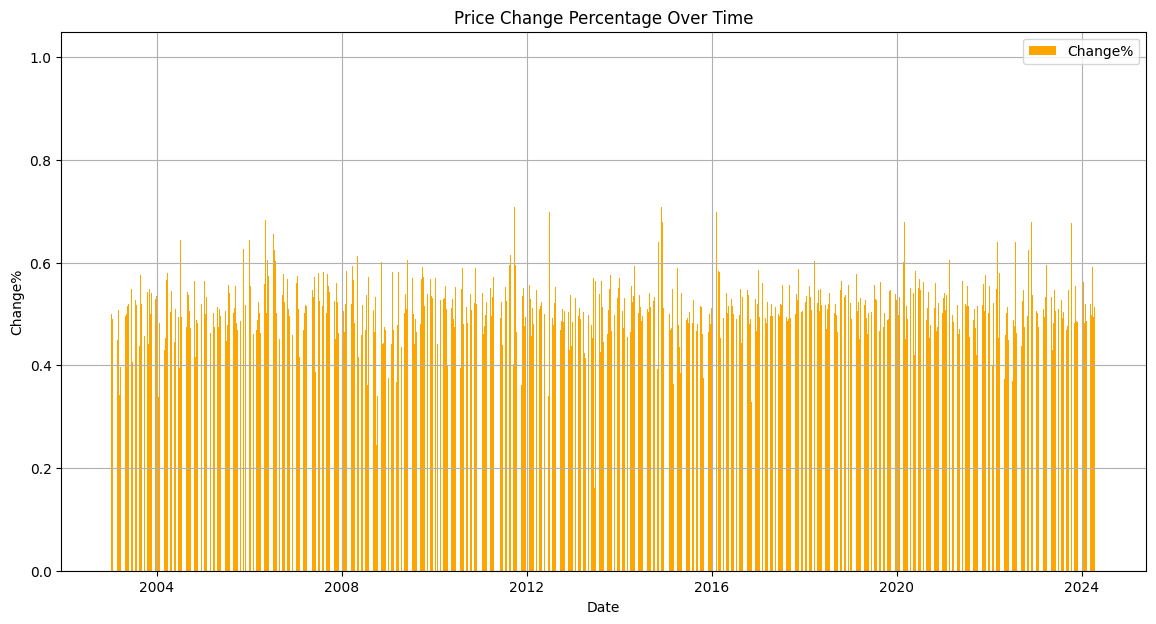

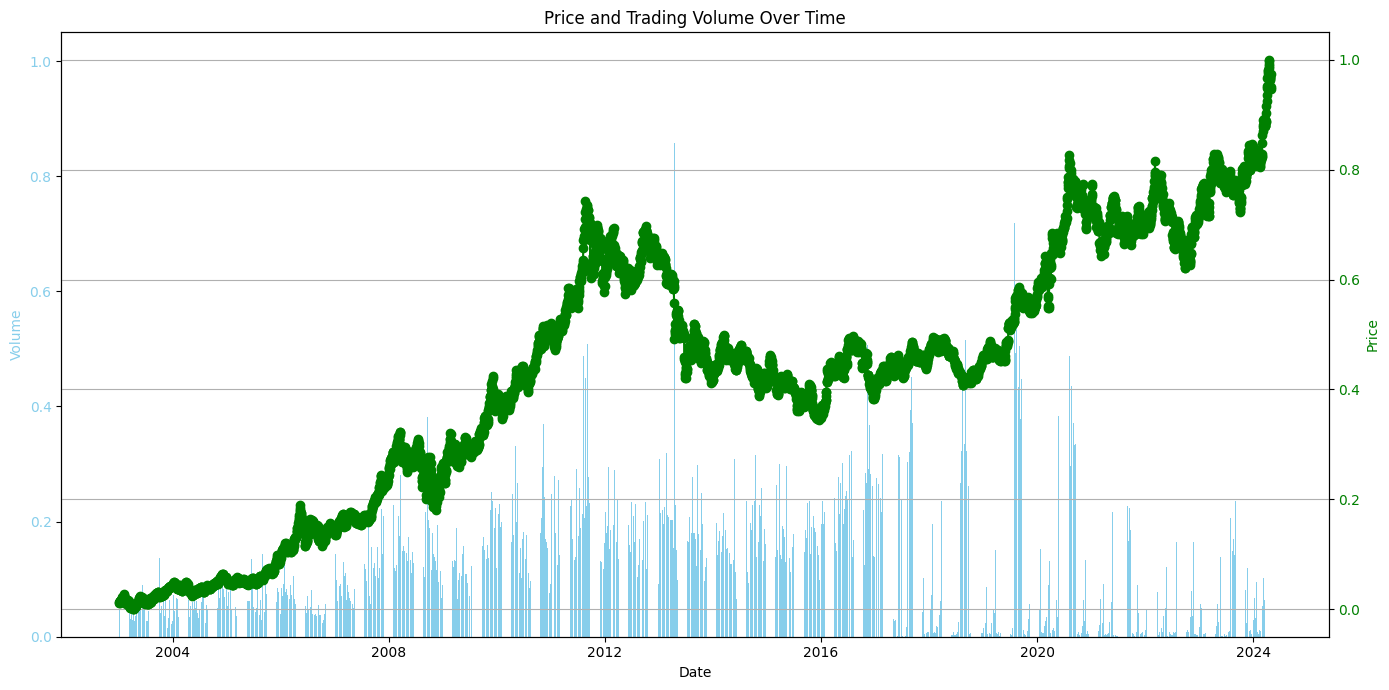

In [47]:

# Biểu đồ cột cho mức thay đổi giá (Change%) theo thời gian
plt.figure(figsize=(14, 7))
plt.bar(scaled_data.index, scaled_data['Change%'], color='orange', label='Change%')
plt.xlabel('Date')
plt.ylabel('Change%')
plt.title('Price Change Percentage Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Kết hợp biểu đồ đường và biểu đồ cột để so sánh Price và Vol
fig, ax1 = plt.subplots(figsize=(14, 7))

# Biểu đồ cột cho Vol
ax1.bar(scaled_data.index, scaled_data['Vol'], color='skyblue', label='Volume')
ax1.set_xlabel('Date')
ax1.set_ylabel('Volume', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Biểu đồ đường cho Price
ax2 = ax1.twinx()
ax2.plot(scaled_data.index, scaled_data['Price'], color='green', label='Price', marker='o')
ax2.set_ylabel('Price', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Price and Trading Volume Over Time')
fig.tight_layout()
plt.grid(True)
plt.show()

# TRAINING MODEL

In [48]:
data = pd.read_csv('Gold_2003_2024_Standardization.csv')
data

,Price,Open,High,Low,Vol,Change%,Date
0,0.011495,0.012734,0.011270,0.011007,0.048388,0.483342,2003-01-02
1,0.013908,0.011974,0.013738,0.011390,0.046453,0.590388,2003-01-03
2,0.014144,0.014635,0.015368,0.014692,0.048792,0.517750,2003-01-06
3,0.012063,0.014777,0.013040,0.012060,0.064235,0.441835,2003-01-07
4,0.015185,0.012591,0.014902,0.012155,0.053029,0.613872,2003-01-08
...,...,...,...,...,...,...,...
5411,0.966129,0.965172,0.957155,0.966214,0.012504,0.519934,2024-04-25
5412,0.968400,0.972916,0.960229,0.976694,0.009957,0.521027,2024-04-26
5413,0.973367,0.973534,0.957807,0.973248,0.011206,0.534134,2024-04-29
5414,0.947301,0.973154,0.952312,0.956260,0.016533,0.383397,2024-04-30


### CHỌN RA CÁC FEATURES VÀ TARGET

In [49]:
# Chọn các cột đầu vào (features) và cột đầu ra (target)
X = data.drop(columns=['Price', 'Date'])
y = data['Price']



### CHIA TẬP TRAIN VÀ TẬP TEST

In [50]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
X_train.shape


(4332, 5)

In [52]:
y_train.shape

(4332,)

In [53]:
X_test.shape

(1084, 5)

In [54]:
y_test.shape

(1084,)

### AdaBoost (Adaptive Boosting)

Mean Absolute Error (MAE_ada): 0.0038612452
Mean Squared Error (MSE_ada): 0.0000256704
Root Mean Squared Error (RMSE_ada): 0.0050665938
R-squared (R²_ada): 0.9995530033


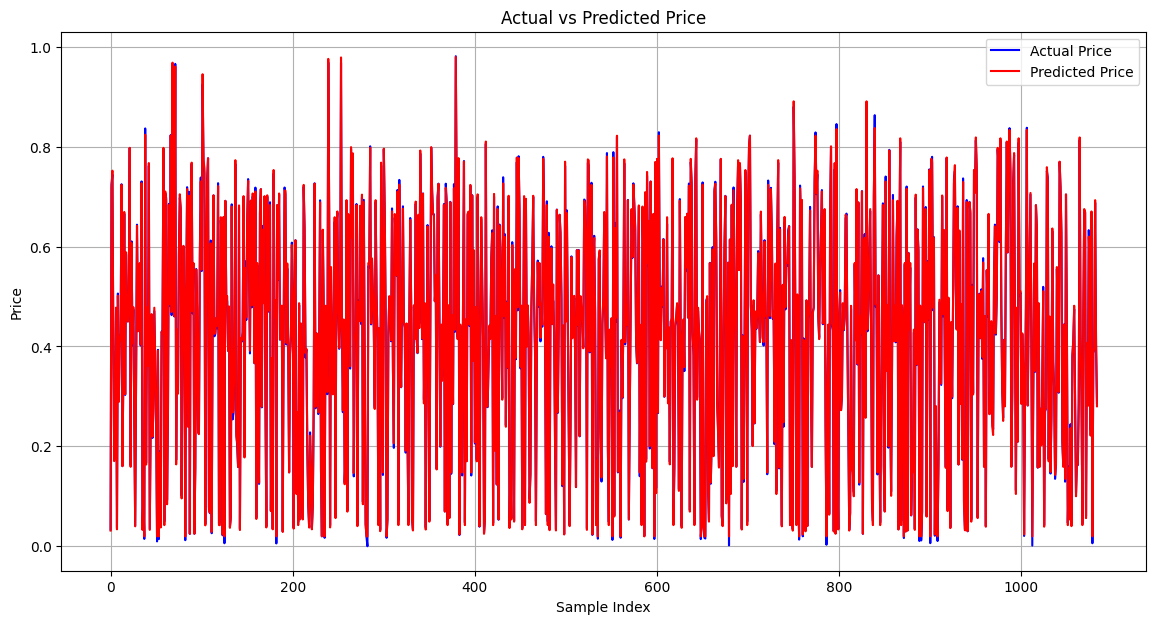

In [55]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error



# Khởi tạo mô hình AdaBoost với cây quyết định làm mô hình cơ sở
ada_model = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4), n_estimators=100, random_state=42)

# Huấn luyện mô hình
ada_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = ada_model.predict(X_test)

# Đánh giá mô hình
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Tính các chỉ số đánh giá mô hình
mae_ada = mean_absolute_error(y_test, y_pred)
mse_ada = mean_squared_error(y_test, y_pred)
rmse_ada = np.sqrt(mse_ada)
r2_ada = r2_score(y_test, y_pred)

# In ra các chỉ số đánh giá
print(f"Mean Absolute Error (MAE_ada): {mae_ada:.10f}")
print(f"Mean Squared Error (MSE_ada): {mse_ada:.10f}")
print(f"Root Mean Squared Error (RMSE_ada): {rmse_ada:.10f}")
print(f"R-squared (R²_ada): {r2_ada:.10f}")


# Hiển thị kết quả dự đoán so với giá trị thực tế bằng biểu đồ linechart
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual Price')
plt.plot(range(len(y_test)), y_pred, color='red', label='Predicted Price')
plt.title('Actual vs Predicted Price')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()




In [56]:
# import pandas as pd
# from sklearn.ensemble import AdaBoostRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_error

# # Chuẩn bị dữ liệu để dự đoán giá cho ngày tiếp theo
# scaled_data['Price_next_day'] = scaled_data['Price'].shift(-1)  # Thêm cột giá của ngày tiếp theo
# data_for_model = scaled_data.dropna()  # Loại bỏ các hàng bị thiếu giá trị do shift

# # Chọn các cột đầu vào (features) và cột đầu ra (target)
# X = data_for_model.drop(columns=['Price', 'Price_next_day'])
# y = data_for_model['Price_next_day']

# # Chia dữ liệu thành tập huấn luyện và tập kiểm tra
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Khởi tạo mô hình AdaBoost với cây quyết định làm mô hình cơ sở
# ada_model = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4), n_estimators=100, random_state=42)

# # Huấn luyện mô hình
# ada_model.fit(X_train, y_train)

# # Dự đoán trên tập kiểm tra
# y_pred = ada_model.predict(X_test)

# # Dự đoán giá cho ngày tiếp theo (dựa trên dữ liệu gần nhất)
# latest_features = scaled_data.drop(columns=['Price', 'Price_next_day']).iloc[-1:].values  # Lấy dữ liệu gần nhất
# next_day_price = ada_model.predict(latest_features)

# print("Dự đoán giá cho ngày tiếp theo:", next_day_price[0])


### XG Boost

Mean Absolute Error (MAE): 0.0021295822
Mean Squared Error (MSE): 0.0000117954
Root Mean Squared Error (RMSE): 0.0034344378
R-squared (R²): 0.9997946080


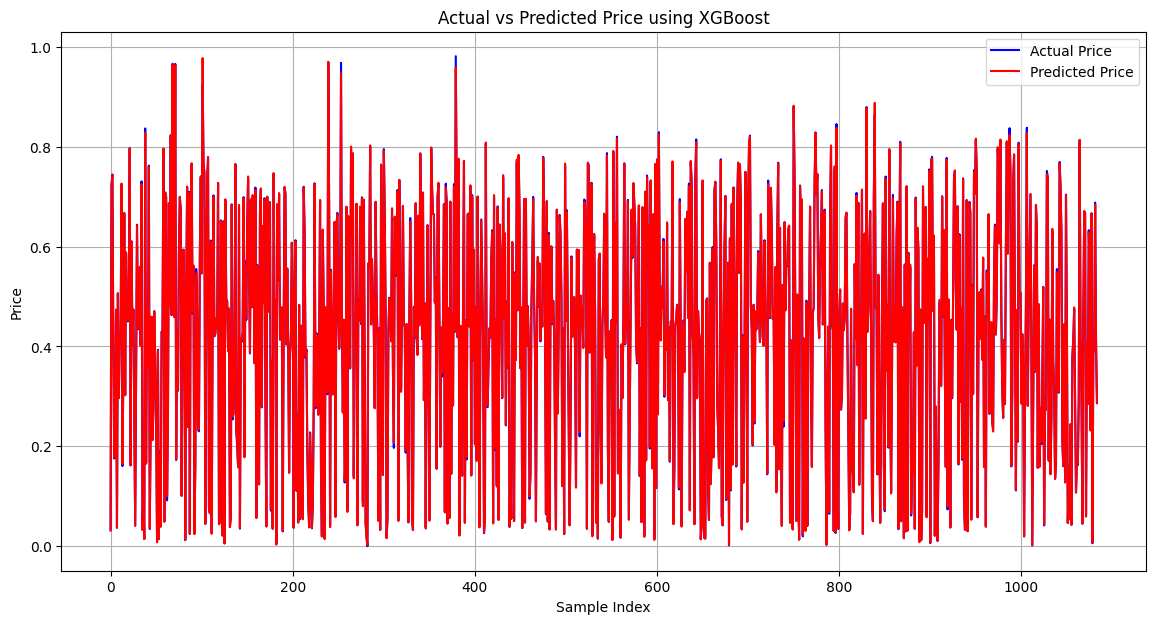

In [57]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Khởi tạo mô hình XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Huấn luyện mô hình
xgb_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_xgb = xgb_model.predict(X_test)

# Đánh giá mô hình
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# In ra các chỉ số đánh giá
print(f"Mean Absolute Error (MAE): {mae_xgb:.10f}")
print(f"Mean Squared Error (MSE): {mse_xgb:.10f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.10f}")
print(f"R-squared (R²): {r2_xgb:.10f}")

# Hiển thị kết quả dự đoán so với giá trị thực tế bằng biểu đồ linechart
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual Price')
plt.plot(range(len(y_test)), y_pred_xgb, color='red', label='Predicted Price')
plt.title('Actual vs Predicted Price using XGBoost')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

### Light GBM

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000140 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 4332, number of used features: 5
[LightGBM] [Info] Start training from score 0.426306
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

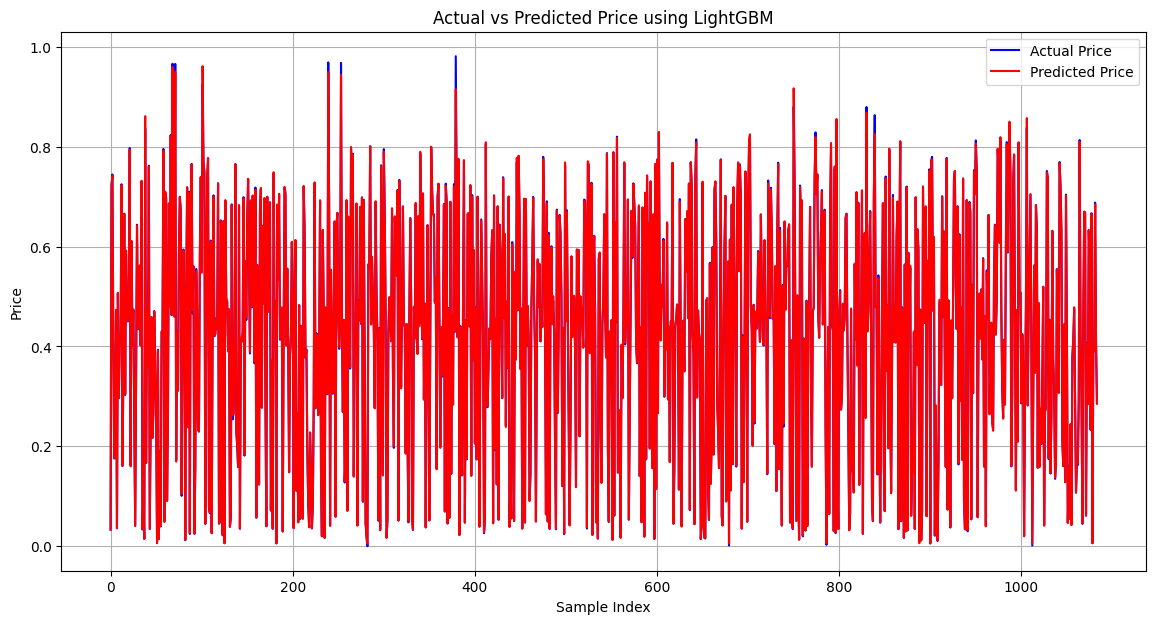

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import lightgbm as lgb
import matplotlib.pyplot as plt


# Khởi tạo mô hình LightGBM
lgb_model = lgb.LGBMRegressor(
    boosting_type='gbdt',
    max_depth=6,
    num_leaves=31,
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

# Huấn luyện mô hình
lgb_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = lgb_model.predict(X_test)

# Đánh giá mô hình
mae_light = mean_absolute_error(y_test, y_pred)
mse_light = mean_squared_error(y_test, y_pred)
rmse_light = np.sqrt(mse_light)
r2_light = r2_score(y_test, y_pred)

# In ra các chỉ số đánh giá
print(f"Mean Absolute Error (MAE): {mae_light:.10f}")
print(f"Mean Squared Error (MSE): {mse_light:.10f}")
print(f"Root Mean Squared Error (RMSE): {rmse_light:.10f}")
print(f"R-squared (R²): {r2_light:.10f}")

# Hiển thị kết quả dự đoán so với giá trị thực tế bằng biểu đồ linechart
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual Price')
plt.plot(range(len(y_test)), y_pred, color='red', label='Predicted Price')
plt.title('Actual vs Predicted Price using LightGBM')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()




### SO SÁNH ĐỘ ĐO ĐÁNH GIÁ MÔ HÌNH

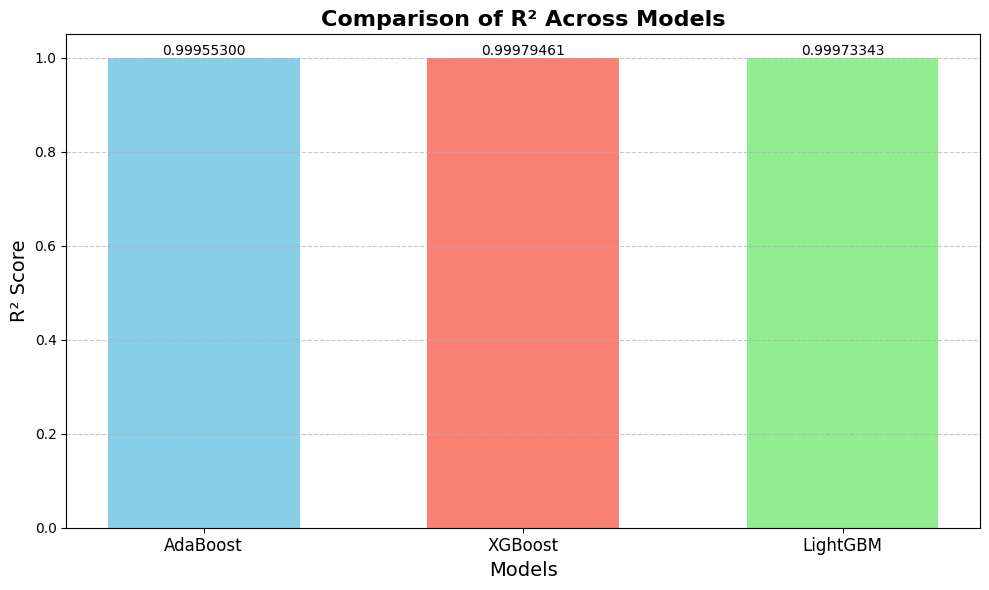

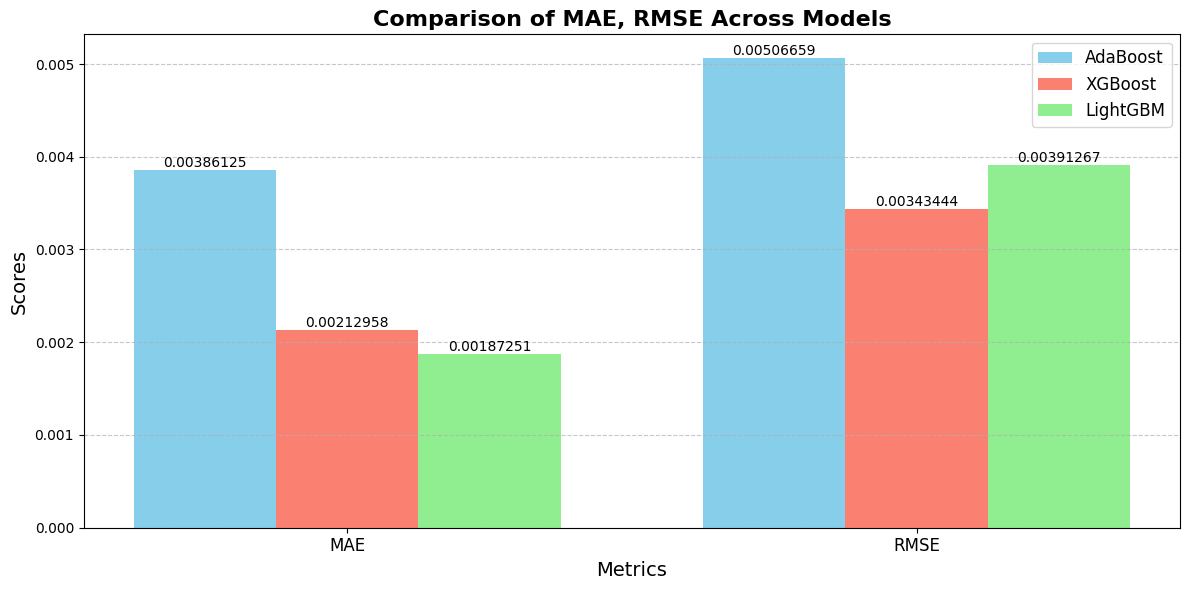

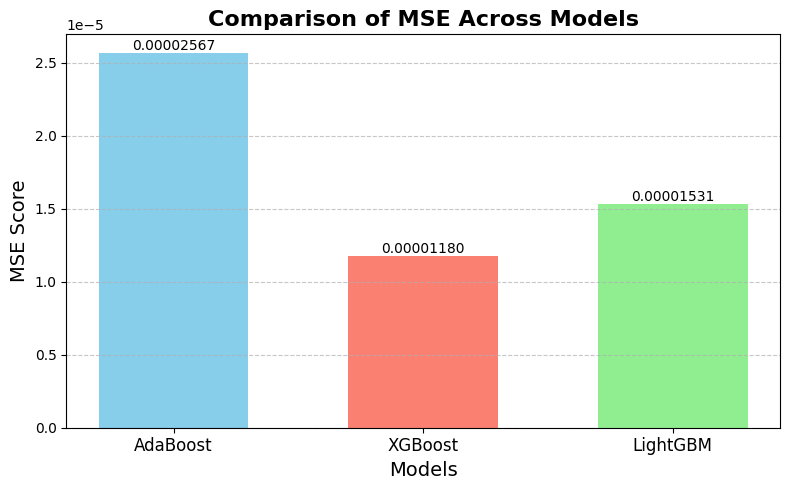

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Tập hợp các giá trị đánh giá của các mô hình
metrics = ['MAE', 'RMSE']
ada_scores = [mae_ada, rmse_ada]
xgb_scores = [mae_xgb, rmse_xgb]
light_scores = [mae_light, rmse_light]

# Chỉ số R²
r2_scores = [r2_ada, r2_xgb, r2_light]
models = ['AdaBoost', 'XGBoost', 'LightGBM']

# Tập hợp các giá trị MSE
mse_scores = [mse_ada, mse_xgb, mse_light]

# -------- Vẽ biểu đồ cột cho R² --------
plt.figure(figsize=(10, 6))
x_r2 = np.arange(len(models))  # Tọa độ các cột
plt.bar(x_r2, r2_scores, color=['skyblue', 'salmon', 'lightgreen'], width=0.6)

# Thêm chi tiết vào biểu đồ R²
plt.title('Comparison of R² Across Models', fontsize=16, fontweight='bold')
plt.xlabel('Models', fontsize=14)
plt.ylabel('R² Score', fontsize=14)
plt.xticks(x_r2, models, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị giá trị trên đầu cột
for i in range(len(models)):
    plt.text(x_r2[i], r2_scores[i], f'{r2_scores[i]:.8f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# -------- Vẽ biểu đồ cột chung cho MAE & RMSE --------
x = np.arange(len(metrics))  # Tọa độ các cột
width = 0.25  # Độ rộng mỗi cột

plt.figure(figsize=(12, 6))

plt.bar(x - width, ada_scores, width, label='AdaBoost', color='skyblue')
plt.bar(x, xgb_scores, width, label='XGBoost', color='salmon')
plt.bar(x + width, light_scores, width, label='LightGBM', color='lightgreen')

# Thêm chi tiết vào biểu đồ
plt.title('Comparison of MAE, RMSE Across Models', fontsize=16, fontweight='bold')
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Scores', fontsize=14)
plt.xticks(x, metrics, fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị các giá trị trên đầu cột
for i in range(len(metrics)):
    plt.text(x[i] - width, ada_scores[i], f'{ada_scores[i]:.8f}', ha='center', va='bottom', fontsize=10)
    plt.text(x[i], xgb_scores[i], f'{xgb_scores[i]:.8f}', ha='center', va='bottom', fontsize=10)
    plt.text(x[i] + width, light_scores[i], f'{light_scores[i]:.8f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# -------- Vẽ biểu đồ cột riêng cho MSE --------
x_mse = np.arange(len(models))  # Tọa độ các cột
plt.figure(figsize=(8, 5))
plt.bar(x_mse, mse_scores, color=['skyblue', 'salmon', 'lightgreen'], width=0.6)

# Chi tiết cho biểu đồ MSE
plt.title('Comparison of MSE Across Models', fontsize=16, fontweight='bold')
plt.xlabel('Models', fontsize=14)
plt.ylabel('MSE Score', fontsize=14)
plt.xticks(x_mse, models, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị giá trị MSE trên đầu cột
for i in range(len(models)):
    plt.text(x_mse[i], mse_scores[i], f'{mse_scores[i]:.8f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


# FEATURES KHI LOẠI BỎ 3 CỘT: DATE, VOL, CHANGE

In [60]:
# Tạo ra 1 dataframe xóa cột: Date, Vol, Change%
X_drop_columns_Date_Vol_Change = data.drop(['Date', 'Vol', 'Change%'], axis=1)
Y_drop_columns_Date_Vol_Change = data['Price']


In [61]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_drop_columns_Date_Vol_Change, Y_drop_columns_Date_Vol_Change, test_size=0.2, random_state=42)

### ADA BOOST

Mean Absolute Error (MAE_ada): 0.0044587943
Mean Squared Error (MSE_ada): 0.0000326300
Root Mean Squared Error (RMSE_ada): 0.0057122706
R-squared (R²_ada): 0.9994318151


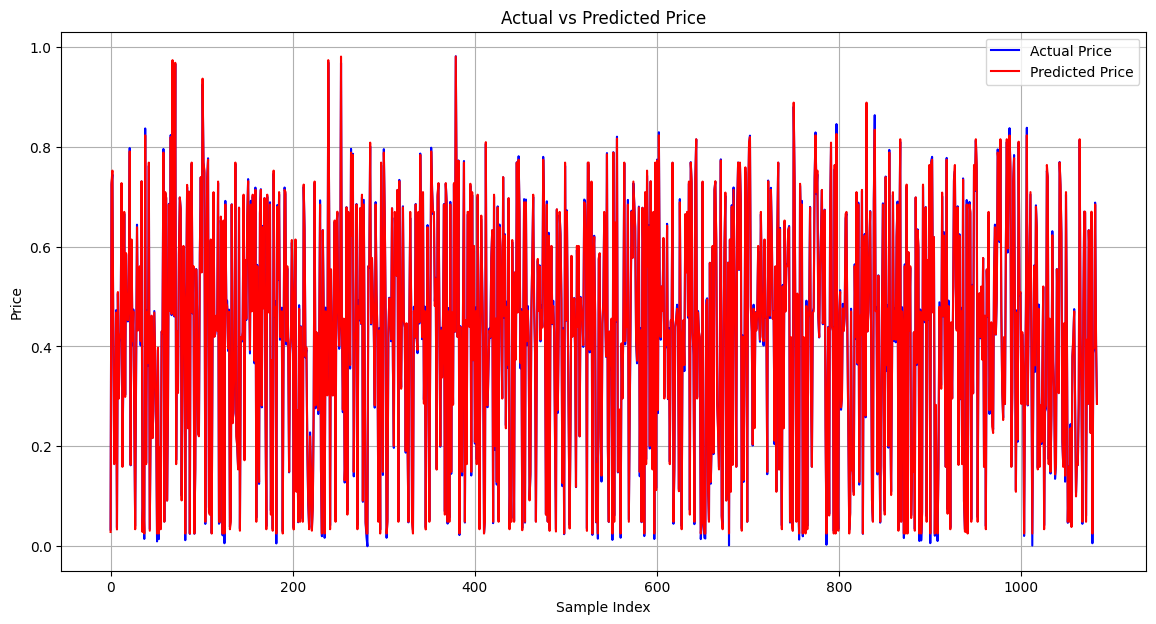

In [62]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error



# Khởi tạo mô hình AdaBoost với cây quyết định làm mô hình cơ sở
ada_model = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4), n_estimators=100, random_state=42)

# Huấn luyện mô hình
ada_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = ada_model.predict(X_test)

# Đánh giá mô hình
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Tính các chỉ số đánh giá mô hình
mae_ada = mean_absolute_error(y_test, y_pred)
mse_ada = mean_squared_error(y_test, y_pred)
rmse_ada = np.sqrt(mse_ada)
r2_ada = r2_score(y_test, y_pred)

# In ra các chỉ số đánh giá
print(f"Mean Absolute Error (MAE_ada): {mae_ada:.10f}")
print(f"Mean Squared Error (MSE_ada): {mse_ada:.10f}")
print(f"Root Mean Squared Error (RMSE_ada): {rmse_ada:.10f}")
print(f"R-squared (R²_ada): {r2_ada:.10f}")


# Hiển thị kết quả dự đoán so với giá trị thực tế bằng biểu đồ linechart
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual Price')
plt.plot(range(len(y_test)), y_pred, color='red', label='Predicted Price')
plt.title('Actual vs Predicted Price')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()




### XGBOOST

Mean Absolute Error (MAE): 0.0010910685
Mean Squared Error (MSE): 0.0000045524
Root Mean Squared Error (RMSE): 0.0021336272
R-squared (R²): 0.9999207299


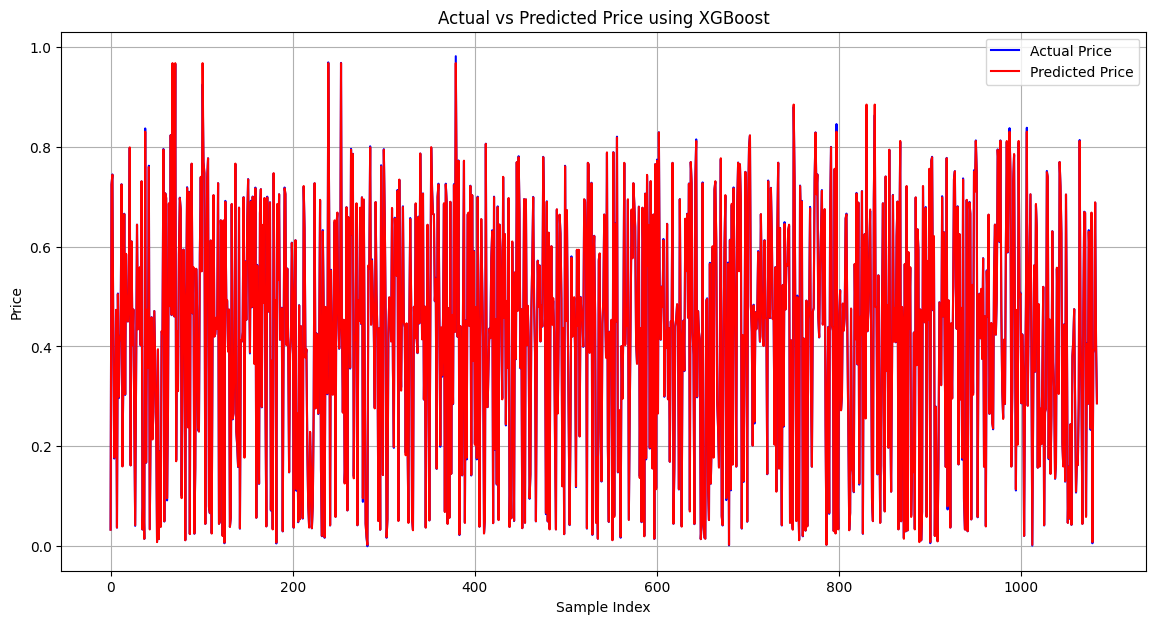

In [63]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Khởi tạo mô hình XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Huấn luyện mô hình
xgb_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_xgb = xgb_model.predict(X_test)

# Đánh giá mô hình
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# In ra các chỉ số đánh giá
print(f"Mean Absolute Error (MAE): {mae_xgb:.10f}")
print(f"Mean Squared Error (MSE): {mse_xgb:.10f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.10f}")
print(f"R-squared (R²): {r2_xgb:.10f}")

# Hiển thị kết quả dự đoán so với giá trị thực tế bằng biểu đồ linechart
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual Price')
plt.plot(range(len(y_test)), y_pred_xgb, color='red', label='Predicted Price')
plt.title('Actual vs Predicted Price using XGBoost')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

### LIGHT GBM

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000091 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 4332, number of used features: 4
[LightGBM] [Info] Start training from score 0.426306
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

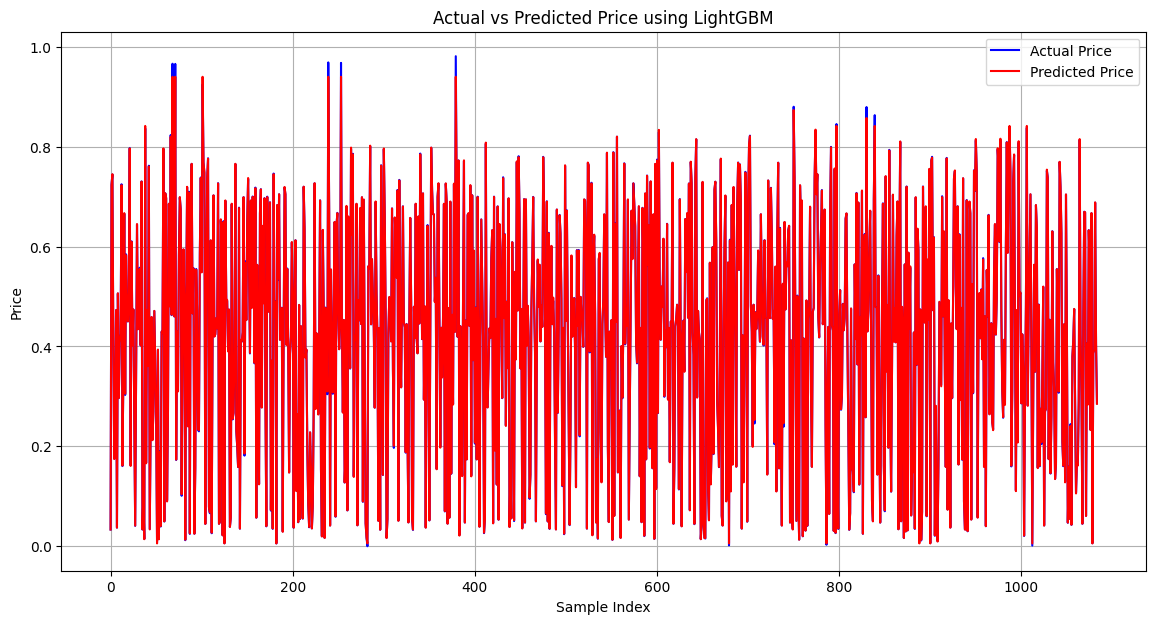

In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import lightgbm as lgb
import matplotlib.pyplot as plt


# Khởi tạo mô hình LightGBM
lgb_model = lgb.LGBMRegressor(
    boosting_type='gbdt',
    max_depth=6,
    num_leaves=31,
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

# Huấn luyện mô hình
lgb_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = lgb_model.predict(X_test)

# Đánh giá mô hình
mae_light = mean_absolute_error(y_test, y_pred)
mse_light = mean_squared_error(y_test, y_pred)
rmse_light = np.sqrt(mse_light)
r2_light = r2_score(y_test, y_pred)

# In ra các chỉ số đánh giá
print(f"Mean Absolute Error (MAE): {mae_light:.10f}")
print(f"Mean Squared Error (MSE): {mse_light:.10f}")
print(f"Root Mean Squared Error (RMSE): {rmse_light:.10f}")
print(f"R-squared (R²): {r2_light:.10f}")

# Hiển thị kết quả dự đoán so với giá trị thực tế bằng biểu đồ linechart
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual Price')
plt.plot(range(len(y_test)), y_pred, color='red', label='Predicted Price')
plt.title('Actual vs Predicted Price using LightGBM')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()




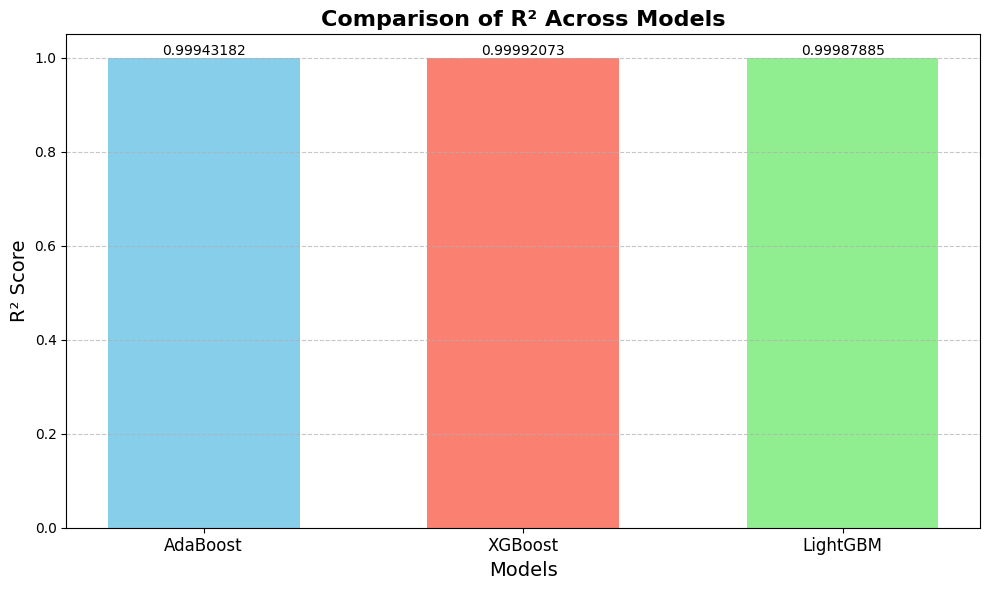

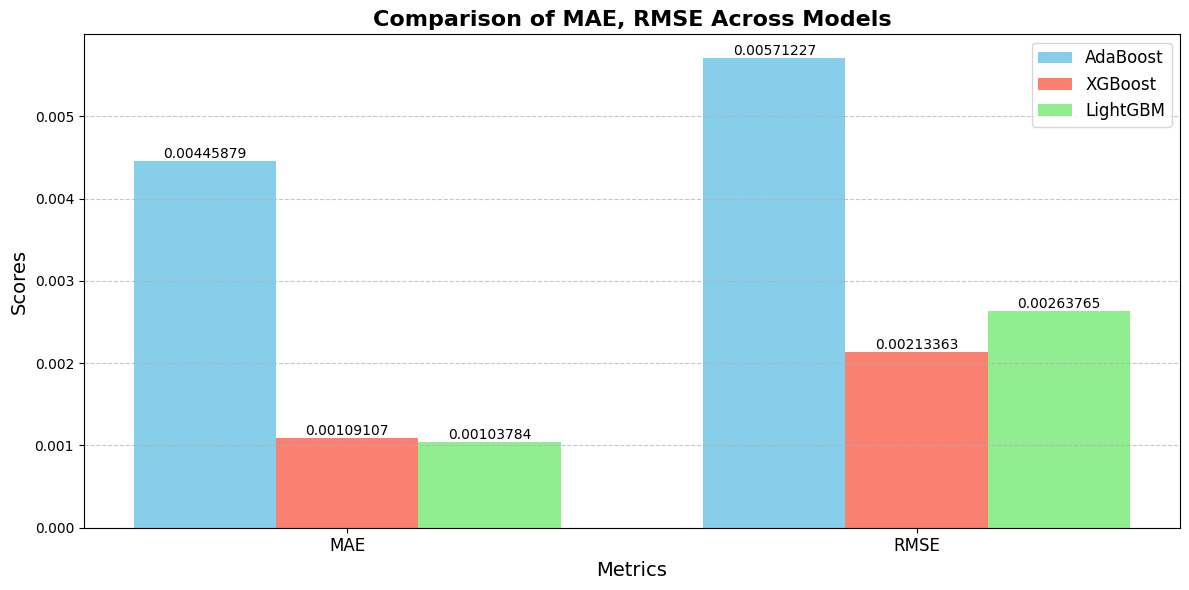

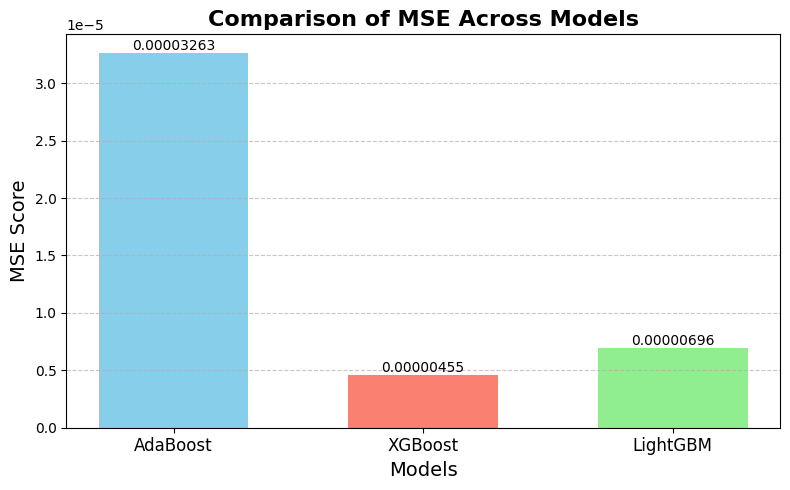

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Tập hợp các giá trị đánh giá của các mô hình
metrics = ['MAE', 'RMSE']
ada_scores = [mae_ada, rmse_ada]
xgb_scores = [mae_xgb, rmse_xgb]
light_scores = [mae_light, rmse_light]

# Chỉ số R²
r2_scores = [r2_ada, r2_xgb, r2_light]
models = ['AdaBoost', 'XGBoost', 'LightGBM']

# Tập hợp các giá trị MSE
mse_scores = [mse_ada, mse_xgb, mse_light]

# -------- Vẽ biểu đồ cột cho R² --------
plt.figure(figsize=(10, 6))
x_r2 = np.arange(len(models))  # Tọa độ các cột
plt.bar(x_r2, r2_scores, color=['skyblue', 'salmon', 'lightgreen'], width=0.6)

# Thêm chi tiết vào biểu đồ R²
plt.title('Comparison of R² Across Models', fontsize=16, fontweight='bold')
plt.xlabel('Models', fontsize=14)
plt.ylabel('R² Score', fontsize=14)
plt.xticks(x_r2, models, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị giá trị trên đầu cột
for i in range(len(models)):
    plt.text(x_r2[i], r2_scores[i], f'{r2_scores[i]:.8f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# -------- Vẽ biểu đồ cột chung cho MAE & RMSE --------
x = np.arange(len(metrics))  # Tọa độ các cột
width = 0.25  # Độ rộng mỗi cột

plt.figure(figsize=(12, 6))

plt.bar(x - width, ada_scores, width, label='AdaBoost', color='skyblue')
plt.bar(x, xgb_scores, width, label='XGBoost', color='salmon')
plt.bar(x + width, light_scores, width, label='LightGBM', color='lightgreen')

# Thêm chi tiết vào biểu đồ
plt.title('Comparison of MAE, RMSE Across Models', fontsize=16, fontweight='bold')
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Scores', fontsize=14)
plt.xticks(x, metrics, fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị các giá trị trên đầu cột
for i in range(len(metrics)):
    plt.text(x[i] - width, ada_scores[i], f'{ada_scores[i]:.8f}', ha='center', va='bottom', fontsize=10)
    plt.text(x[i], xgb_scores[i], f'{xgb_scores[i]:.8f}', ha='center', va='bottom', fontsize=10)
    plt.text(x[i] + width, light_scores[i], f'{light_scores[i]:.8f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# -------- Vẽ biểu đồ cột riêng cho MSE --------
x_mse = np.arange(len(models))  # Tọa độ các cột
plt.figure(figsize=(8, 5))
plt.bar(x_mse, mse_scores, color=['skyblue', 'salmon', 'lightgreen'], width=0.6)

# Chi tiết cho biểu đồ MSE
plt.title('Comparison of MSE Across Models', fontsize=16, fontweight='bold')
plt.xlabel('Models', fontsize=14)
plt.ylabel('MSE Score', fontsize=14)
plt.xticks(x_mse, models, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị giá trị MSE trên đầu cột
for i in range(len(models)):
    plt.text(x_mse[i], mse_scores[i], f'{mse_scores[i]:.8f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


mse min is the best
rmse min is the best
mae min is the best